## **Logistic Regression Basics**

1- Try different learning rates  
2- Try with/without feature scaling  
3- Try polynomial regression  
4- Try Scikit library  



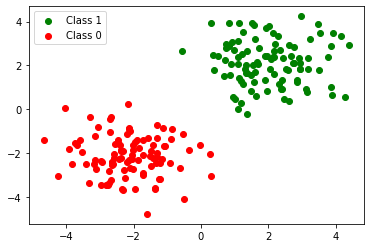

[0.         0.10355302 0.10639323]
[1.45708203e-04 1.82453327e-01 1.87573084e-01]
[0.0003925  0.24456433 0.25155501]
[0.0007057  0.29529911 0.30386252]
[0.00106122 0.3380376  0.3479508 ]
[0.00144315 0.37491843 0.38600989]
[0.00184117 0.4073488  0.41948295]
[0.00224848 0.43629331 0.44936045]
[0.00266059 0.46243796 0.47634754]
[0.00307449 0.48628629 0.50096229]
[0.00348811 0.50821809 0.52359577]
[0.00390007 0.52852646 0.54455002]
[0.0043094  0.54744221 0.56406298]
[0.00471547 0.56515017 0.58232537]
[0.00511783 0.58180065 0.59949233]
[0.0055162  0.59751747 0.61569174]
[0.00591042 0.61240383 0.63103024]
[0.00630039 0.62654667 0.64559768]
[0.00668607 0.64001987 0.65947046]
[0.00706746 0.65288676 0.67271411]
[0.0074446  0.66520205 0.68538521]
[0.00781753 0.67701329 0.69753303]
[0.00818633 0.68836212 0.70920065]
[0.00855107 0.69928517 0.72042603]
[0.00891183 0.70981483 0.73124274]
[0.00926871 0.71997994 0.74168064]
[0.0096218  0.72980621 0.75176642]
[0.00997118 0.73931673 0.76152399]
[0.01031

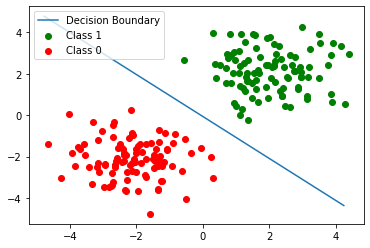

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate synthetic data
np.random.seed(0)
num_samples = 100
X1 = np.random.randn(num_samples, 2) + np.array([2, 2])
X2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])
y = np.hstack([np.ones(num_samples), np.zeros(num_samples)])

# Plot data
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], color='green', label='Class 1')
plt.scatter(X[num_samples:, 0], X[num_samples:, 1], color='red', label='Class 0')
plt.legend()
plt.show()

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression using gradient descent
def logistic_regression(X, y, learning_rate, num_iterations):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])  # Add intercept term
    theta = np.zeros(n + 1)

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        # print(theta)

    return theta

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train logistic regression model
theta = logistic_regression(X, y, learning_rate, num_iterations)

# Predict function
def predict(X, theta):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
    return sigmoid(np.dot(X, theta)) >= 0.5

# Predictions
y_pred = predict(X, theta)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

# Display metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)

# Decision boundary
x_values = np.array([X[:, 1].min(), X[:, 1].max()])
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

# Plot decision boundary
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], color='green', label='Class 1')
plt.scatter(X[num_samples:, 0], X[num_samples:, 1], color='red', label='Class 0')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
plt.show()


Polynomial Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate non-linearly separable data
np.random.seed(0)
num_samples = 200
theta = np.linspace(0, 2 * np.pi, num_samples)
r1 = 5 + np.random.randn(num_samples) * 0.5
r2 = 10 + np.random.randn(num_samples) * 0.5

X1 = np.array([r1 * np.cos(theta), r1 * np.sin(theta)]).T
X2 = np.array([r2 * np.cos(theta), r2 * np.sin(theta)]).T

X = np.vstack([X1, X2])
y = np.hstack([np.ones(num_samples), np.zeros(num_samples)])

# Plot data
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], color='green', label='Class 1')
plt.scatter(X[num_samples:, 0], X[num_samples:, 1], color='red', label='Class 0')
plt.legend()
plt.show()

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Polynomial features
def add_polynomial_features(X, degree):
    m, n = X.shape
    new_features = [np.ones((m, 1))]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_features.append((X[:, 0]**(i - j) * X[:, 1]**j).reshape(-1, 1))

    return np.hstack(new_features)

# Logistic regression using gradient descent
def logistic_regression(X, y, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

    return theta

# Hyperparameters
learning_rate = 0.1
num_iterations = 10000
degree = 2  # Degree of polynomial

# Add polynomial features
X_poly = add_polynomial_features(X, degree)

# Train logistic regression model
theta = logistic_regression(X_poly, y, learning_rate, num_iterations)

# Predict function
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

# Predictions
y_pred = predict(X_poly, theta)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

# Display metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)

# Plot decision boundary
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
v = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = sigmoid(np.dot(add_polynomial_features(np.array([[u[i], v[j]]]), degree), theta))

z = z.T

plt.contourf(u, v, z, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], color='green', label='Class 1')
plt.scatter(X[num_samples:, 0], X[num_samples:, 1], color='red', label='Class 0')
plt.legend()
plt.show()
